In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import norm
from pykalman import KalmanFilter
%matplotlib inline

In [191]:
import pandas as pd
data1 = pd.read_csv('Dataset1.csv')
data1[:5]

,x,y,z
0,-0.058678,-0.023950,-0.007185
1,-0.088017,-0.014969,0.000000
2,-0.029339,-0.023950,0.005389
3,-0.065264,-0.023351,-0.001796
4,-0.023950,-0.031135,0.010179


In [192]:
mydata = data1.reset_index()

In [193]:
myx = mydata[['index','x']]

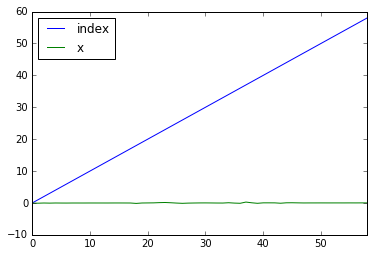

In [194]:
myx.plot()

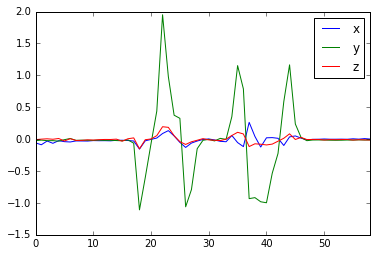

In [195]:
data1.plot()

In [196]:
# kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
kf = KalmanFilter(n_dim_state=1, n_dim_obs=1)

In [197]:
measurements = np.asarray(myx.x.values)

In [198]:
kf = kf.em(measurements, n_iter=5)

In [199]:
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [200]:
 filtered_state_means[:5]

array([[-0.06046938],
       [-0.07784428],
       [-0.0458043 ],
       [-0.05872472],
       [-0.03562289]])

In [201]:
smoothed_state_means[:5]

array([[-0.06221354],
       [-0.06805323],
       [-0.04763693],
       [-0.05128579],
       [-0.03655036]])

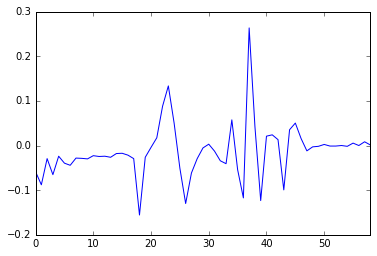

In [202]:
myx.x.plot()

In [203]:
type(myx)

pandas.core.frame.DataFrame

In [204]:
type(smoothed_state_means)

numpy.ndarray

In [205]:
ssm_df = pd.DataFrame(smoothed_state_means, columns=['x'])
#ssm_df.set_index('index', inplace=True)

In [206]:
fsm_df = pd.DataFrame(filtered_state_means, columns=['x'])
fsm_df[:5]

,x
0,-0.060469
1,-0.077844
2,-0.045804
3,-0.058725
4,-0.035623


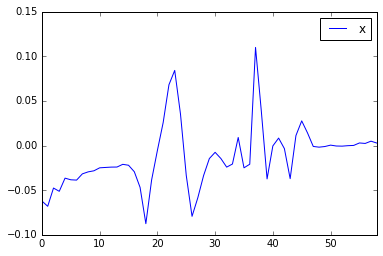

In [207]:
ssm_df.plot()

In [208]:
myx.set_index('index', inplace=True)

In [209]:
myx.columns = ['x']

In [210]:
myx[:5]

,x
index,
0,-0.058678
1,-0.088017
2,-0.029339
3,-0.065264
4,-0.023950


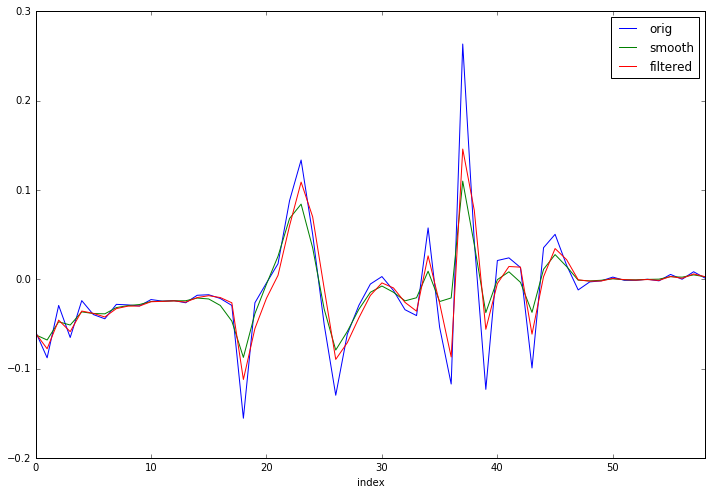

In [211]:
ax = myx.x.plot(label='orig',figsize=(12,8))
ssm_df.x.plot(ax=ax,label='smooth')
fsm_df.x.plot(ax=ax,label='filtered')
ax.legend()

In [212]:
type(kf)

pykalman.standard.KalmanFilter

In [213]:
# smoothed_state_covariances

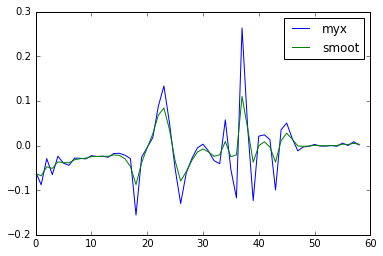

In [214]:
#How to plot without pandas

fig = plt.figure()
plt.plot(myx.index, myx.x, label='myx')
#ssm_df.x.plot(ax=ax,label='smooth')
#fsm_df.x.plot(ax=ax,label='filtered')
plt.plot(ssm_df.index, ssm_df.x, label='smoot')
plt.legend()
plt.show()